In [5]:
# Initial setup
import os
import librosa
import numpy as np
import pickle
from librosa import display
import matplotlib.pyplot as plt

This notebook demonstrates how to use LibROSA package to load and extract features from an audio file from RAVDESS dataset.

#### RAVDESS: https://smartlaboratory.org/ravdess/

Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

#### LibROSA: https://librosa.github.io/librosa/

### 1. Load Audio File

Loads and decodes the audio as a time series `y`, represented as a one-dimensional NumPy floating point array. The variable `sr` contains the sampling rate of `y`, that is, the number of samples per second of audio. By default, all audio is mixed to mono and resampled to 22050 Hz at load time. This behavior can be overridden by supplying additional arguments to `librosa.load()`.

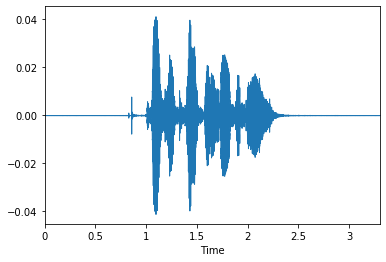

In [18]:
# Import one audio file
file_name = "Actor_01/03-01-01-01-01-01-01.wav"
data, sampling_rate = librosa.load(file_name)
# Display waveplot
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()

### 2. Feature Extraction

#### MFCC (Mel Frequency Cepstral Coefficients): https://en.wikipedia.org/wiki/Mel-frequency_cepstrum

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC[1]. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

In [15]:
mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T,axis=0)

### 3. Emotion Label
#### RAVDESS File Naming Convention

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

Filename identifiers 

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the ‘neutral’ emotion.
- Statement (01 = “Kids are talking by the door”, 02 = “Dogs are sitting by the door”).
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

<font color='red'> Here, I substract 1 from the emotion label in the file name such that: </font>
- 0 = Neutral
- 1 = calm
- 2 = happy
- 3 = sad
- 4 = angry
- 5 = fearful
- 6 = disgust
- 7 = suprised

In [48]:
print("Emotion label: {}".format(int(file_name[7:8]) - 1))

Emotion label: 7


### 4. Process All Audio Files

In [6]:
# Process all audio files
path = "/Users/wangwanqi/Desktop/Audio_Speech_Actors_01-24"
X = []
y = []
for subdir, dirs, files in os.walk(path):
    for file_name in files:
        if "wav" in file_name:
            data, sampling_rate = librosa.load(os.path.join(subdir, file_name))
            mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=50).T,axis=0)
            label = int(file_name[7:8]) - 1
            X.append(mfccs)
            y.append(label)

In [7]:
# Save X and y
with open('data/X.pkl','wb') as f:
     pickle.dump(X, f)
        
with open('data/y.pkl','wb') as f:
     pickle.dump(y, f)